In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# import libraries

In [2]:
%cd /content/drive/MyDrive/iti/NLP/project

/content/drive/MyDrive/iti/NLP/project


In [3]:
! pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 17.2 MB/s eta 0:00:00


In [4]:
import tensorflow as tf

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import contractions
import string
import re 

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import preprocessing

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


# Read Database

In [5]:
conn = sqlite3.connect('/content/drive/MyDrive/iti/NLP/project/dialects_database.db')

cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()


data = pd.read_sql_query(f'Select * from {tables[0][0]};', conn).set_index('id')
y = pd.read_sql_query(f'Select * from {tables[1][0]};', conn).set_index('id')


df = pd.concat([data, y], ignore_index=False, axis=1)

In [6]:
tables

[('id_text',), ('id_dialect',)]

In [7]:
data.shape, y.shape

((147725, 1), (147725, 1))

In [8]:
df

,text,dialect
id,,
1009754958479151232,@toha_Altomy @gy_yah قليلين ادب ومنافقين. لو ا...,LY
1009794751548313600,@AlmFaisal 😂😂 الليبيين متقلبين!!!\nبس بالنسبة ...,LY
1019989115490787200,@smsm071990 @ALMOGRBE كل 20 تانيه شاب ليبي بير...,LY
1035479791758135168,@AboryPro @lyranoo85 رانيا عقليتك متخلفة. اولا...,LY
1035481122921164800,@lyranoo85 شكلك متعقدة علشان الراجل لي تحبيه ا...,LY
...,...,...
982775354405376000,الناس دي بتنفخ في قربة مقدودة بالدارجي كده ال...,SD
980728852224860160,@Wail_Hamza @amiromer انت عايش وين بره السودان...,SD
975502734668500992,مااحرم نفسي ميسي حريف ولعاب برضو ..\nمدريدي وا...,SD


In [9]:
df['text'].duplicated().sum().sum()

0

In [10]:
df.isnull().sum().sum()

0

In [11]:
x_label = df['dialect'].value_counts().index.tolist()
y_label = df['dialect'].value_counts().tolist()
y_label

[57636, 36499, 27617, 14434, 11539]

(array([57636.,     0.,     0., 36499.,     0.,     0., 27617.,     0.,
            0., 14434.,     0., 11539.]),
 array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
        1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ,
        3.33333333, 3.66666667, 4.        ]),
 <BarContainer object of 12 artists>)

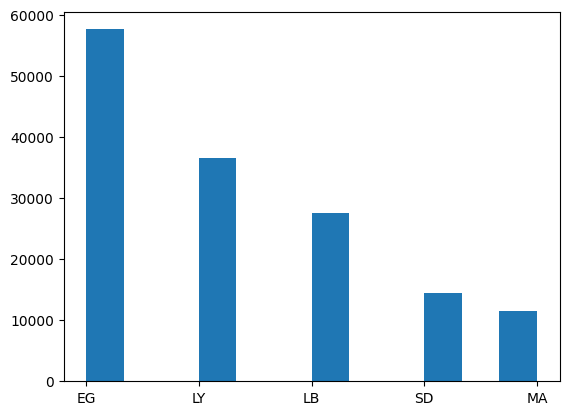

In [12]:
plt.hist(x = x_label, weights = y_label, bins= 12)

# Preprocess data and drop stopwords for machine learning model

In [13]:
df_ML = df.copy()
df_ML

,text,dialect
id,,
1009754958479151232,@toha_Altomy @gy_yah قليلين ادب ومنافقين. لو ا...,LY
1009794751548313600,@AlmFaisal 😂😂 الليبيين متقلبين!!!\nبس بالنسبة ...,LY
1019989115490787200,@smsm071990 @ALMOGRBE كل 20 تانيه شاب ليبي بير...,LY
1035479791758135168,@AboryPro @lyranoo85 رانيا عقليتك متخلفة. اولا...,LY
1035481122921164800,@lyranoo85 شكلك متعقدة علشان الراجل لي تحبيه ا...,LY
...,...,...
982775354405376000,الناس دي بتنفخ في قربة مقدودة بالدارجي كده ال...,SD
980728852224860160,@Wail_Hamza @amiromer انت عايش وين بره السودان...,SD
975502734668500992,مااحرم نفسي ميسي حريف ولعاب برضو ..\nمدريدي وا...,SD


In [14]:
df_ML['text'] = df_ML["text"].apply(lambda x: preprocessing.processing(x, 1))

In [15]:
df_ML

,text,dialect
id,,
1009754958479151232,قليلين ادب ومنافقين اختهم او قريبتهم تتعاكس تق...,LY
1009794751548313600,الليبيين متقلبين بالنسبة ليا انا ميليشياوي زما...,LY
1019989115490787200,تانيه شاب ليبي بيرتاح لبنت مختلفة ويلاحظ انها...,LY
1035479791758135168,رانيا عقليتك متخلفة اولا الانسان يلي يحتاج اهل...,LY
1035481122921164800,شكلك متعقدة علشان الراجل تحبيه ازوج بنت يتيمة ...,LY
...,...,...
982775354405376000,الناس دي بتنفخ قربة مقدودة بالدارجي كده البلد ...,SD
980728852224860160,انت عايش وين بره السودان شنو ماشايف البحصل دا,SD
975502734668500992,مااحرم نفسي ميسي حريف ولعاب برضو مدريدي وافتخر,SD


In [16]:
print("text: ", df['text'].iloc[3000])
print("preprocessed text: ", df_ML['text'].iloc[3000])

text:  @Caty83III باهي توا نتفرج وريني ابداعك في القروب بعدين😁😘
preprocessed text:  باهي توا نتفرج وريني ابداعك القروب بعدين


In [17]:
print(df_ML['text'].duplicated().sum().sum())
df_ML.drop_duplicates(subset = ['text'], inplace = True)

123


In [18]:
df_ML['text'].duplicated().sum().sum()

0

In [19]:
df_ML.isnull().sum().sum()

0

In [20]:
df_ML.drop(index = 1173913615495303168, inplace = True)

In [21]:
df_ML.to_csv("/content/drive/MyDrive/iti/NLP/project/preprocessed files/preprocessed_file_ML.csv")

# Preprocess data without dropping stopwords for Deep learning model

In [22]:
df_DL = df.copy()
df_DL

,text,dialect
id,,
1009754958479151232,@toha_Altomy @gy_yah قليلين ادب ومنافقين. لو ا...,LY
1009794751548313600,@AlmFaisal 😂😂 الليبيين متقلبين!!!\nبس بالنسبة ...,LY
1019989115490787200,@smsm071990 @ALMOGRBE كل 20 تانيه شاب ليبي بير...,LY
1035479791758135168,@AboryPro @lyranoo85 رانيا عقليتك متخلفة. اولا...,LY
1035481122921164800,@lyranoo85 شكلك متعقدة علشان الراجل لي تحبيه ا...,LY
...,...,...
982775354405376000,الناس دي بتنفخ في قربة مقدودة بالدارجي كده ال...,SD
980728852224860160,@Wail_Hamza @amiromer انت عايش وين بره السودان...,SD
975502734668500992,مااحرم نفسي ميسي حريف ولعاب برضو ..\nمدريدي وا...,SD


In [23]:
df_DL['text'] = df_DL["text"].apply(lambda x: preprocessing.processing(x, 0))

In [24]:
df_DL

,text,dialect
id,,
1009754958479151232,قليلين ادب ومنافقين لو اختهم او قريبتهم تتعاك...,LY
1009794751548313600,الليبيين متقلبين \nبس بالنسبة ليا انا ميليشيا...,LY
1019989115490787200,كل تانيه شاب ليبي بيرتاح لبنت مختلفة ويلاحظ ا...,LY
1035479791758135168,رانيا عقليتك متخلفة اولا الانسان يلي يحتاج اه...,LY
1035481122921164800,شكلك متعقدة علشان الراجل لي تحبيه ازوج بنت يتي...,LY
...,...,...
982775354405376000,الناس دي بتنفخ في قربة مقدودة بالدارجي كده ال...,SD
980728852224860160,انت عايش وين بره السودان ولا شنو ماشايف البحصل دا,SD
975502734668500992,مااحرم نفسي ميسي حريف ولعاب برضو \nمدريدي وافتخر,SD


In [25]:
print("text: ", df['text'].iloc[3000])
print("preprocessed text: ", df_DL['text'].iloc[3000])

text:  @Caty83III باهي توا نتفرج وريني ابداعك في القروب بعدين😁😘
preprocessed text:  باهي توا نتفرج وريني ابداعك في القروب بعدين  


In [26]:
print(df_DL['text'].duplicated().sum().sum())
df_DL.drop_duplicates(subset = ['text'], inplace = True)

78


In [27]:
df_DL['text'].duplicated().sum().sum()

0

In [28]:
df_DL.isnull().sum().sum()

0

In [29]:
df_DL.drop(index = 1173913615495303168, inplace = True)

In [30]:
df_DL.to_csv("/content/drive/MyDrive/iti/NLP/project/preprocessed files/preprocessed_file_DL.csv")